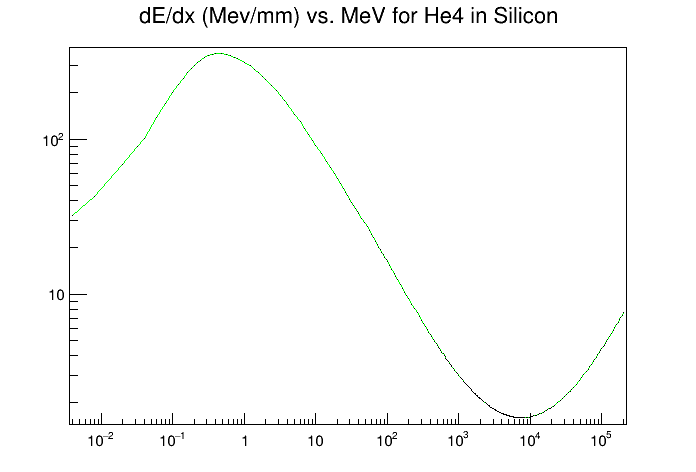

In [1]:
//%jsroot on //读取4He在Si中的能损信息
ifstream in_he4("He4elossinSi.txt");
string ss_he4;
double a_he4, b_he4, e_he4, dedx_he4;
auto *g_he4 = new TGraph;
TCanvas c_he4;
if(!in_he4.is_open())
{
    cout<<"Data File about He4 does noet exist!"<<endl;
    return 0;
}
getline(in_he4,ss_he4);
int i_he4=0;
while(!in_he4.eof())
{
    in_he4>>a_he4>>b_he4>>e_he4>>dedx_he4>>a_he4>>b_he4>>a_he4>>b_he4>>a_he4>>b_he4>>a_he4>>b_he4;
    g_he4->SetPoint(i_he4,e_he4*4,dedx_he4*1000);//number,MeV,MeV/mm
    i_he4++;
}
g_he4->SetTitle("dE/dx (Mev/mm) vs. MeV for He4 in Silicon");
g_he4->SetLineColor(kGreen);
g_he4->GetXaxis()->SetRangeUser(0,10000);
g_he4->Draw();
gPad->SetLogy();
gPad->SetLogx();
c_he4.Draw();
in_he4.close();

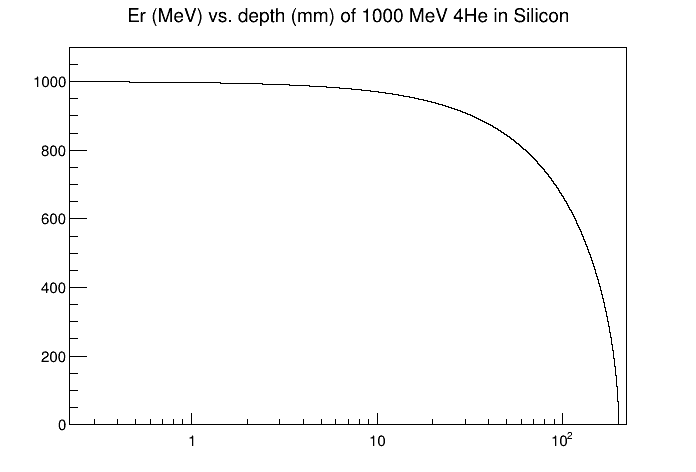

depth:200.532 mm


In [2]:
//%jsroot on;//本行代码1000 MeV的4He粒子在Si不同厚度时的剩余能量(e=f(x)）以及不同剩余能量对应的穿透厚度(x=f(e)）；
Double_t er_he4 = 1000.;//MeV：1000 MeV 4he；
Double_t dx_he4 = 0.001;//mm：穿透每个切片的厚度；
Double_t x_he4=0.0;//mm：穿透总厚度
auto * d2e_he4 = new TGraph;//depth to Er (Er vs depth);
auto * e2d_he4 = new TGraph;//Er to depth (depth vs Er);
TCanvas c_d2e_he4;
Int_t j_he4 =0;
while(er_he4>0)
{
    d2e_he4->SetPoint(j_he4,x_he4,er_he4);//写入穿透该切片前位置与dedx(Er vs depth)
    e2d_he4->SetPoint(j_he4,er_he4,x_he4);//写入穿透该切片前位置与dedx(depth vs Er)
    j_he4++;//下一切片；
    x_he4=j_he4*dx_he4;//穿透该切片后位置；
    er_he4=er_he4-dx_he4*g_he4->Eval(er_he4);//穿透切片后剩余能量；
}
d2e_he4->SetPoint(j_he4,x_he4,0);//写入4He能量全部沉积后的位置与er；
e2d_he4->SetPoint(j_he4,0,x_he4);//写入4He能量全部沉积后的位置与er；
d2e_he4->SetTitle("Er (MeV) vs. depth (mm) of 1000 MeV 4He in Silicon");
d2e_he4->SetLineColor(kRed);
d2e_he4->Draw();
//gPad->SetLogy();
gPad->SetLogx();
c_d2e_he4.Draw();
cout<<"depth:"<<x_he4<<" mm"<<endl;

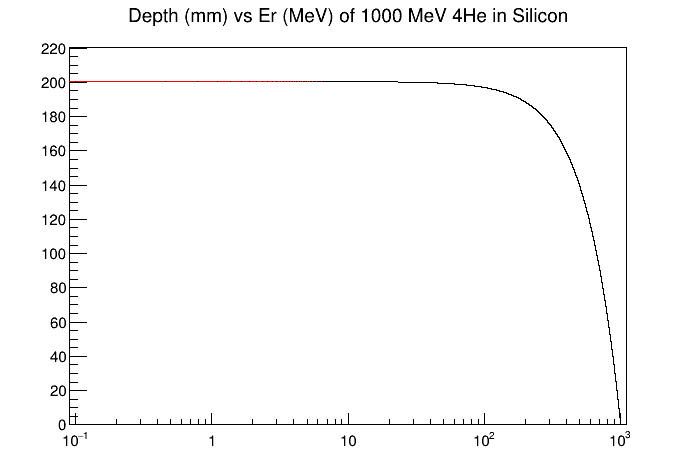

Depth of 1000 MeV 4He in Sillicon:200.532 mm
Depth of 5.486 MeV 4He in Sillicon:0.0277423 mm
Depth of 10 MeV 4He in Sillicon:0.0692679 mm
Depth of 100 MeV 4He in Sillicon:3.48517 mm
Depth of 200 MeV 4He in Sillicon:12.0104 mm


In [3]:
//%jsroot on
TCanvas c_e2d_he4;
e2d_he4->SetTitle("Depth (mm) vs Er (MeV) of 1000 MeV 4He in Silicon");
e2d_he4->SetLineColor(kRed);
e2d_he4->Draw();
//gPad->SetLogy();
gPad->SetLogx();
c_e2d_he4.Draw();
cout<<"Depth of 1000 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)<<" mm"<<endl;
cout<<"Depth of 5.486 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(5.486)<<" mm"<<endl;
cout<<"Depth of 10 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(10)<<" mm"<<endl;
cout<<"Depth of 100 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(100)<<" mm"<<endl;
cout<<"Depth of 200 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(200)<<" mm"<<endl;

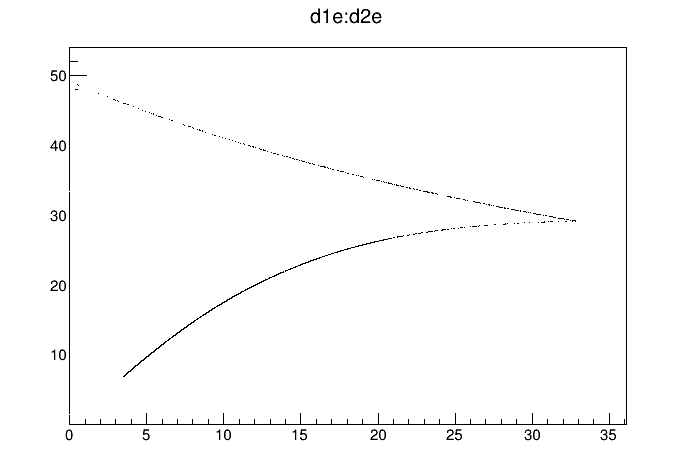

In [4]:
//%jsroot on
//the energy loss of 0～300 MeV 4He in 1000, 500,1000 um silicon;

Double_t e_he4_x;//x MeV;
Double_t thickness[3] ={ 1.,0.5,1.};//mm;
Double_t x_depth;
Double_t de[3];

auto * d1e_d2e = new TGraph;
auto * d2e_d3e = new TGraph;
TCanvas c_d1e_d2e;

TRandom3 *energy =new TRandom3(0);

for(Int_t ientries=0;ientries<10000;ientries++)
{
    e_he4_x=energy->Uniform(0.,300.);
    for(Int_t thicknessi=0;thicknessi<3;thicknessi++)
    {
    x_depth=e2d_he4->Eval(e_he4_x);
    x_depth=x_depth+thickness[thicknessi];
    de[thicknessi]=e_he4_x-d2e_he4->Eval(x_depth);
        if(de[thicknessi]<e_he4_x)
        {
          de[thicknessi]=de[thicknessi];  
        }
        else
        {
        de[thicknessi]=e_he4_x;
        }
    e_he4_x=e_he4_x-de[thicknessi];
    } 
  // cout<<de[0]<<"  "<<de[1]<<"  "<<de[2]<<endl;
     d1e_d2e->SetPoint(ientries,de[1],de[0]);
     d2e_d3e->SetPoint(ientries,de[2],de[1]);
}
d1e_d2e->SetTitle("d1e:d2e");
d1e_d2e->SetLineColor(kFALSE);
d1e_d2e->Draw();
c_d1e_d2e.Draw();

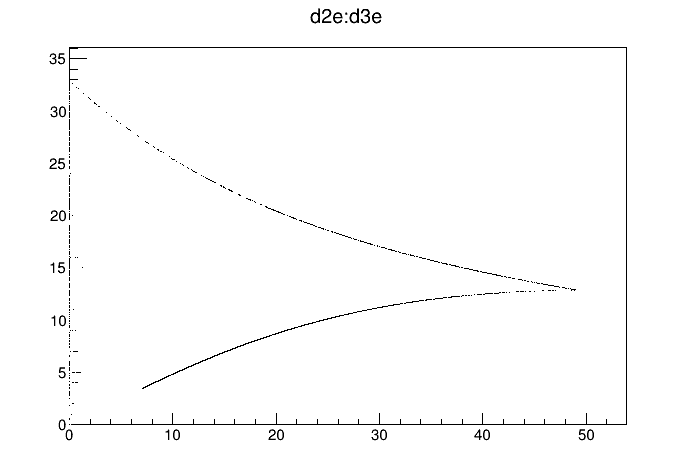

In [5]:
//%jsroot on
TCanvas c_d2e_d3e;
d2e_d3e->SetTitle("d2e:d3e");
d2e_d3e->SetLineColor(kFALSE);
d2e_d3e->Draw();
c_d2e_d3e.Draw();

In [6]:
//%jsroot on //读取6He在Si中的能损信息
ifstream in_he6("He6elossinSi.txt");
string ss_he6;
double a_he6, b_he6, e_he6, dedx_he6;
auto *g_he6 = new TGraph;
TCanvas c_he6;
if(!in_he6.is_open())
{
    cout<<"Data File about He6 does noet exist!"<<endl;
    return 0;
}
getline(in_he6,ss_he6);
int i_he6=0;
while(!in_he6.eof())
{
    in_he6>>a_he6>>b_he6>>e_he6>>dedx_he6>>a_he6>>b_he6>>a_he6>>b_he6>>a_he6>>b_he6>>a_he6>>b_he6;
    g_he6->SetPoint(i_he6,e_he6*6,dedx_he6*1000);//number,MeV,MeV/mm
    i_he6++;
}
/*
g_he6->SetTitle("dE/dx (Mev/mm) vs. MeV for He6 in Silicon");
g_he6->SetLineColor(kGreen);
g_he6->Draw();
gPad->SetLogy();
gPad->SetLogx();
c_he6.Draw();
*/
in_he6.close();

In [7]:
//%jsroot on;//本行代码1000 MeV的6He粒子在Si不同厚度时的剩余能量(e=f(x)）以及不同剩余能量对应的穿透厚度(x=f(e)）；
Double_t er_he6 = 1000.;//MeV：1000 MeV 6he；
Double_t dx_he6 = 0.001;//mm：穿透每个切片的厚度；
Double_t x_he6=0.0;//mm：穿透总厚度
auto * d2e_he6 = new TGraph;//depth to Er (Er vs depth);
auto * e2d_he6 = new TGraph;//Er to depth (depth vs Er);
TCanvas c_d2e_he6;
Int_t j_he6 =0;
while(er_he6>0)
{
    d2e_he6->SetPoint(j_he6,x_he6,er_he6);//写入穿透该切片前位置与dedx(Er vs depth)
    e2d_he6->SetPoint(j_he6,er_he6,x_he6);//写入穿透该切片前位置与dedx(depth vs Er)
    j_he6++;//下一切片；
    x_he6=j_he6*dx_he6;//穿透该切片后位置；
    er_he6=er_he6-dx_he6*g_he6->Eval(er_he6);//穿透切片后剩余能量；
}
d2e_he6->SetPoint(j_he6,x_he6,0);//写入6He能量全部沉积后的位置与er；
e2d_he6->SetPoint(j_he6,0,x_he6);//写入6He能量全部沉积后的位置与er；
/*
d2e_he6->SetTitle("Er (MeV) vs. depth (mm) of 1000 MeV 6He in Silicon");
d2e_he6->SetLineColor(kRed);
d2e_he6->Draw();
//gPad->SetLogy();
gPad->SetLogx();
c_d2e_he6.Draw();
cout<<"depth:"<<x_he6<<" mm"<<endl;
*/

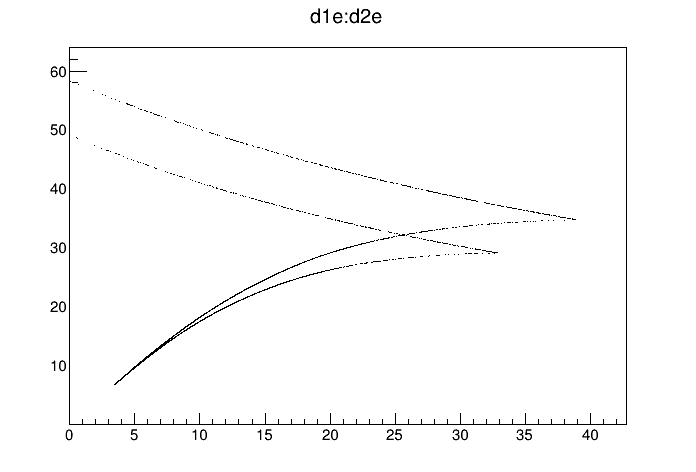

In [8]:
//%jsroot on
//the energy loss of 0～300 MeV 6He in 1000, 500,1000 um silicon;

Double_t e_he6_x;//x MeV;
//Double_t thickness[3] ={ 1.,0.5,1.};//mm;
//Double_t x_depth;
//Double_t de[3];

//auto * d1e_d2e = new TGraph;
//auto * d2e_d3e = new TGraph;
//TCanvas c_d1e_d2e;

//TRandom3 *energy =new TRandom3(0);

for(Int_t ientries=10000;ientries<20000;ientries++)
{
    e_he6_x=energy->Uniform(0.,300.);
    for(Int_t thicknessi=0;thicknessi<3;thicknessi++)
    {
    x_depth=e2d_he6->Eval(e_he6_x);
    x_depth=x_depth+thickness[thicknessi];
    de[thicknessi]=e_he6_x-d2e_he6->Eval(x_depth);
        if(de[thicknessi]<e_he6_x)
        {
          de[thicknessi]=de[thicknessi];  
        }
        else
        {
        de[thicknessi]=e_he6_x;
        }
    e_he6_x=e_he6_x-de[thicknessi];
    } 
  // cout<<de[0]<<"  "<<de[1]<<"  "<<de[2]<<endl;
     d1e_d2e->SetPoint(ientries,de[1],de[0]);
     d2e_d3e->SetPoint(ientries,de[2],de[1]);
}
d1e_d2e->SetTitle("d1e:d2e");
d1e_d2e->SetLineColor(kFALSE);
d1e_d2e->Draw();
c_d1e_d2e.Draw();

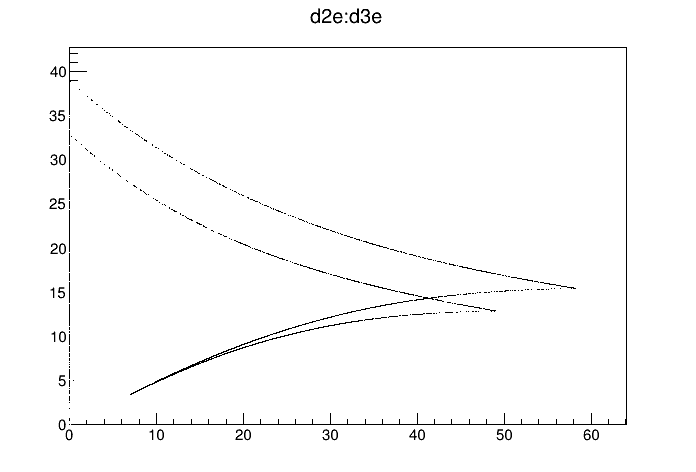

In [9]:
//%jsroot on
//TCanvas c_d2e_d3e;
//d2e_d3e->SetTitle("d2e:d3e");
d2e_d3e->SetLineColor(kFALSE);
d2e_d3e->Draw();
c_d2e_d3e.Draw();

In [10]:
//%jsroot on //读取8He在Si中的能损信息
ifstream in_he8("He8elossinSi.txt");
string ss_he8;
double a_he8, b_he8, e_he8, dedx_he8;
auto *g_he8 = new TGraph;
TCanvas c_he8;
if(!in_he8.is_open())
{
    cout<<"Data File about He8 does noet exist!"<<endl;
    return 0;
}
getline(in_he8,ss_he8);
int i_he8=0;
while(!in_he8.eof())
{
    in_he8>>a_he8>>b_he8>>e_he8>>dedx_he8>>a_he8>>b_he8>>a_he8>>b_he8>>a_he8>>b_he8>>a_he8>>b_he8;
    g_he8->SetPoint(i_he8,e_he8*8,dedx_he8*1000);//number,MeV,MeV/mm
    i_he8++;
}
/*
g_he8->SetTitle("dE/dx (Mev/mm) vs. MeV for He8 in Silicon");
g_he8->SetLineColor(kGreen);
g_he8->Draw();
gPad->SetLogy();
gPad->SetLogx();
c_he8.Draw();
*/
in_he8.close();

In [11]:
//%jsroot on;//本行代码1000 MeV的8He粒子在Si不同厚度时的剩余能量(e=f(x)）以及不同剩余能量对应的穿透厚度(x=f(e)）；
Double_t er_he8 = 1000.;//MeV：1000 MeV 8he；
Double_t dx_he8 = 0.001;//mm：穿透每个切片的厚度；
Double_t x_he8=0.0;//mm：穿透总厚度
auto * d2e_he8 = new TGraph;//depth to Er (Er vs depth);
auto * e2d_he8 = new TGraph;//Er to depth (depth vs Er);
TCanvas c_d2e_he8;
Int_t j_he8 =0;
while(er_he8>0)
{
    d2e_he8->SetPoint(j_he8,x_he8,er_he8);//写入穿透该切片前位置与dedx(Er vs depth)
    e2d_he8->SetPoint(j_he8,er_he8,x_he8);//写入穿透该切片前位置与dedx(depth vs Er)
    j_he8++;//下一切片；
    x_he8=j_he8*dx_he8;//穿透该切片后位置；
    er_he8=er_he8-dx_he8*g_he8->Eval(er_he8);//穿透切片后剩余能量；
}
d2e_he8->SetPoint(j_he8,x_he8,0);//写入8He能量全部沉积后的位置与er；
e2d_he8->SetPoint(j_he8,0,x_he8);//写入8He能量全部沉积后的位置与er；

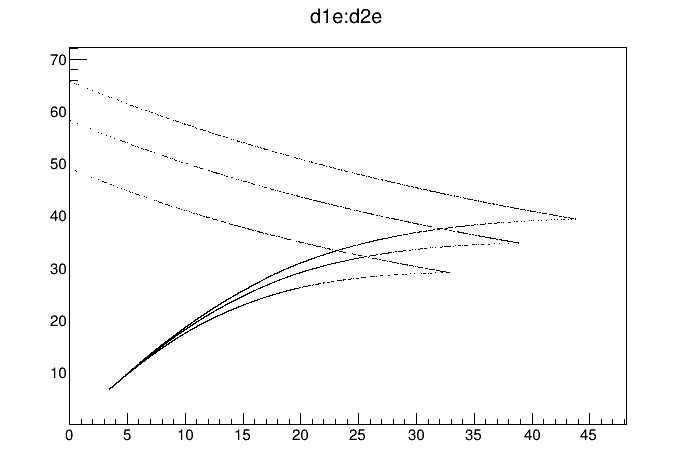

In [12]:
//%jsroot on
//the energy loss of 0～300 MeV 8He in 1000, 500,1000 um silicon;

Double_t e_he8_x;//x MeV;

for(Int_t ientries=20000;ientries<30000;ientries++)
{
    e_he8_x=energy->Uniform(0.,300.);
    for(Int_t thicknessi=0;thicknessi<3;thicknessi++)
    {
    x_depth=e2d_he8->Eval(e_he8_x);
    x_depth=x_depth+thickness[thicknessi];
    de[thicknessi]=e_he8_x-d2e_he8->Eval(x_depth);
        if(de[thicknessi]<e_he8_x)
        {
          de[thicknessi]=de[thicknessi];  
        }
        else
        {
        de[thicknessi]=e_he8_x;
        }
    e_he8_x=e_he8_x-de[thicknessi];
    } 
  // cout<<de[0]<<"  "<<de[1]<<"  "<<de[2]<<endl;
     d1e_d2e->SetPoint(ientries,de[1],de[0]);
     d2e_d3e->SetPoint(ientries,de[2],de[1]);
}
//d1e_d2e->SetTitle("d1e:d2e");
d1e_d2e->SetLineColor(kFALSE);
d1e_d2e->Draw();
c_d1e_d2e.Draw();

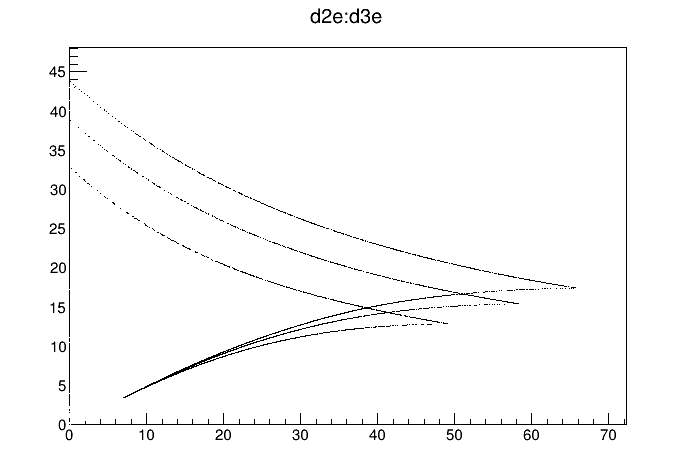

In [13]:
//%jsroot on
//TCanvas c_d2e_d3e;
//d2e_d3e->SetTitle("d2e:d3e");
d2e_d3e->SetLineColor(kFALSE);
d2e_d3e->Draw("PMC");
c_d2e_d3e.Draw();

In [14]:
!jupyter nbconvert 4.PID-He.ipynb --to html

[NbConvertApp] Converting notebook 4.PID-He.ipynb to html


